In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
data=pd.read_csv('Algerian_forest_fires_cleaned.csv')

In [40]:
data.drop(['index','day','month','year'],axis=1,inplace=True)

In [41]:
data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [42]:
data.Classes.value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [43]:
data['Classes']=np.where(data.Classes.str.contains('not fire'),0,1)

In [44]:
data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [45]:
data.Classes.value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [46]:
x=data.drop('FWI',axis=1)

In [47]:
y=data.FWI

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

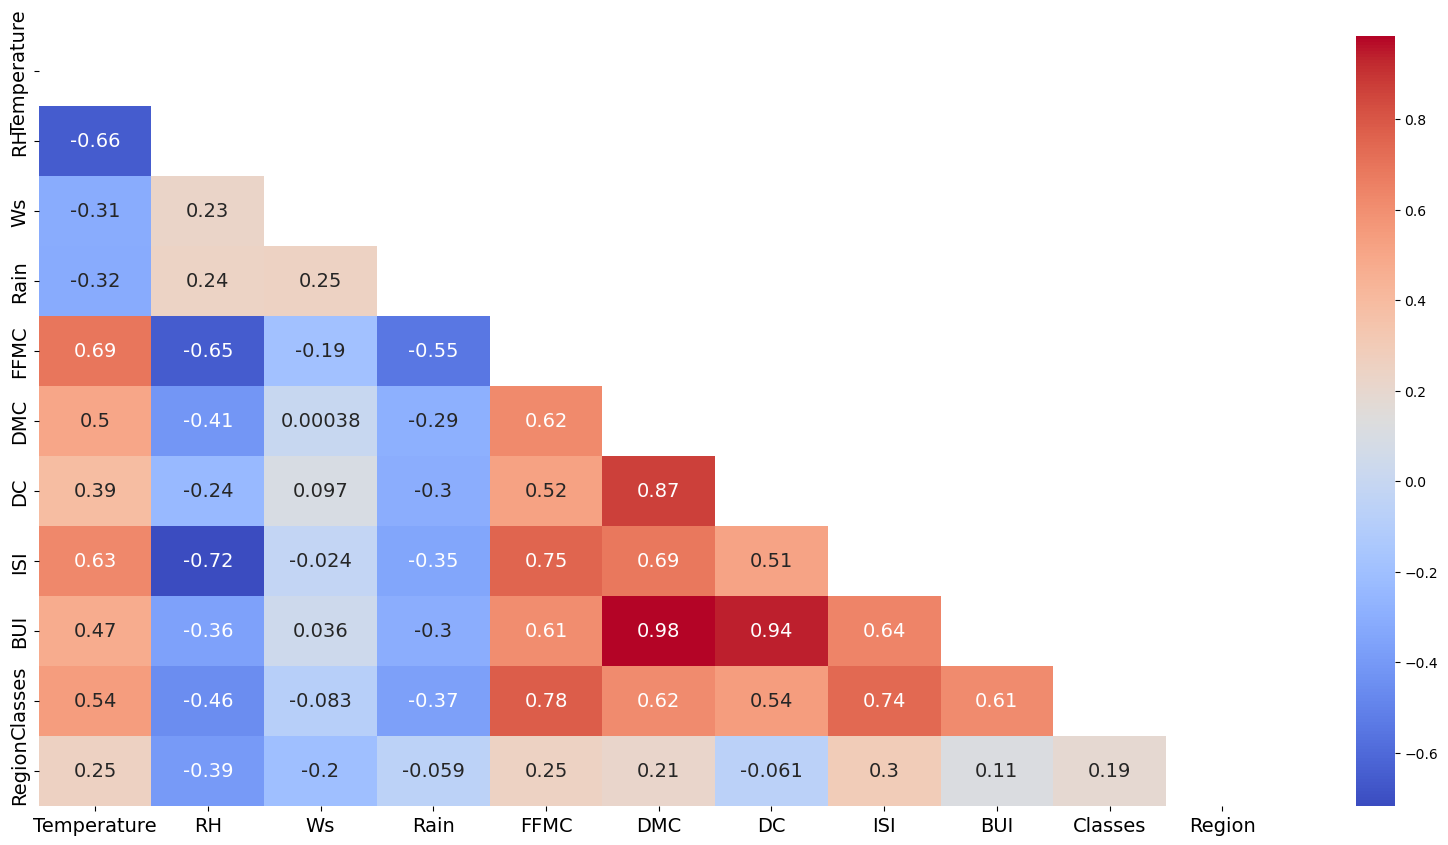

In [49]:
plt.figure(figsize=(20,10))
mask=np.triu(x_train.corr())
heat_map=sns.heatmap(x_train.corr(),mask=mask,annot=True,cmap='coolwarm',annot_kws={'size':14})
heat_map.set_xticklabels(heat_map.get_xticklabels(),fontsize=14)
heat_map.set_yticklabels(heat_map.get_yticklabels(),fontsize=14)
plt.show()

In [50]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr


In [51]:
multicolinearity=correlation(x_train,0.80)
multicolinearity

{'BUI', 'DC'}

In [52]:
x_train.drop(['BUI','DC'],axis=1,inplace=True)
x_test.drop(['BUI','DC'],axis=1,inplace=True)
x_train.shape,x_test.shape

((182, 9), (61, 9))

In [53]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [54]:
x_train_scaled=scalar.fit_transform(x_train)
x_test_scaled=scalar.transform(x_test)

C:\Users\Yohannan\AppData\Local\Temp\ipykernel_14312\1485466055.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


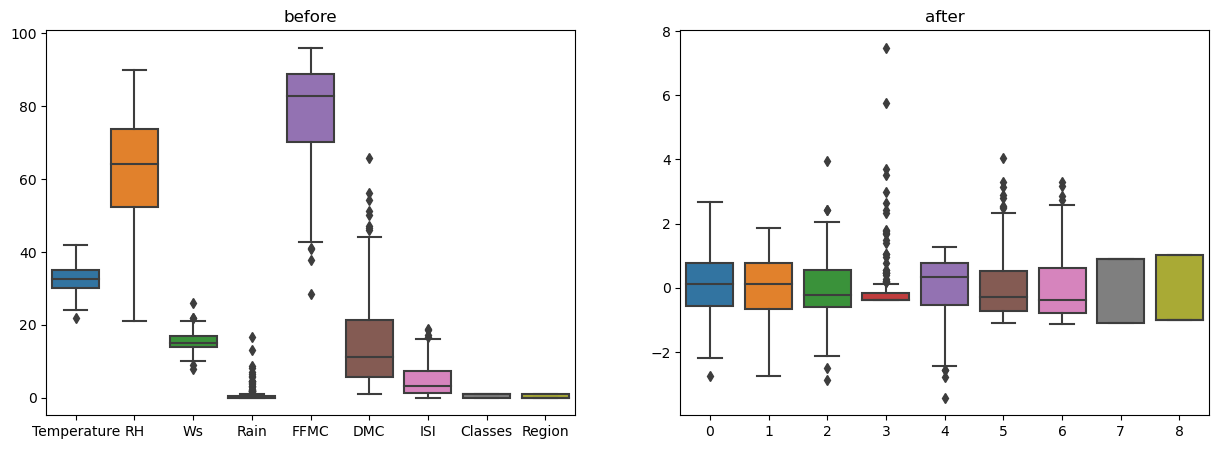

In [55]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title('before')
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)
plt.title('after')
plt.show()

MAE: 0.5468236465249988
MSE: 0.6742766873791602
R2 Score: 0.9847657384266951


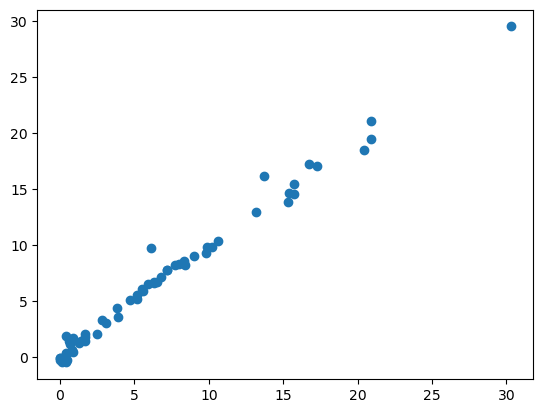

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
lin_reg=LinearRegression()
lin_reg.fit(x_train_scaled,y_train)
y_pred=lin_reg.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
scorer2=r2_score(y_test,y_pred)
print('MAE:',mae)
print('MSE:',mse)
print('R2 Score:',scorer2)
plt.scatter(y_test,y_pred)
plt.show()

MAE: 1.1331759949144087
MSE: 2.248345891897475
R2 Score: 0.9492020263112388


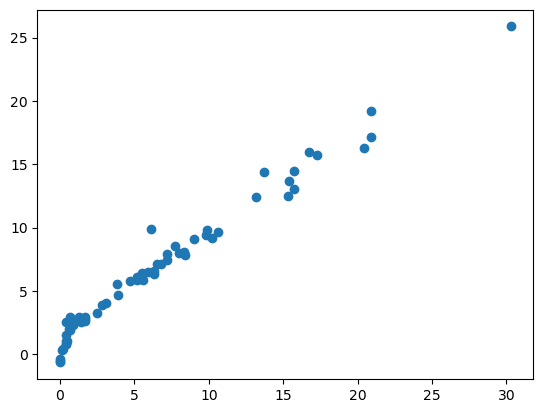

In [57]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(x_train_scaled,y_train)
y_pred_lasso=lasso.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred_lasso)
mse=mean_squared_error(y_test,y_pred_lasso)
scorer2=r2_score(y_test,y_pred_lasso)
print('MAE:',mae)
print('MSE:',mse)
print('R2 Score:',scorer2)
plt.scatter(y_test,y_pred_lasso)
plt.show()

MAE: 0.6199701158263436
MSE: 0.792499555474364
R2 Score: 0.9820946715928274


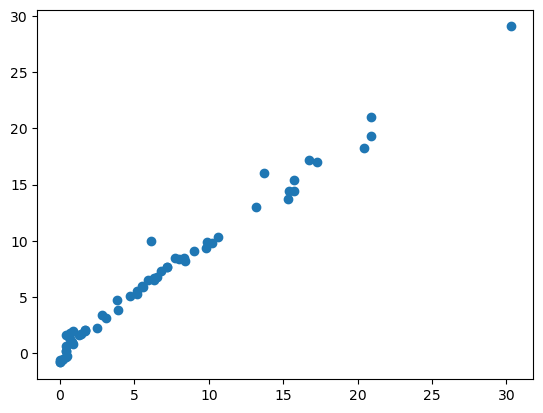

In [58]:
from sklearn.linear_model import LassoCV
lasso_CV=LassoCV(cv=5)
lasso_CV.fit(x_train_scaled,y_train)
y_pred_lassocv=lasso_CV.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred_lassocv)
mse=mean_squared_error(y_test,y_pred_lassocv)
scorer2=r2_score(y_test,y_pred_lassocv)
print('MAE:',mae)
print('MSE:',mse)
print('R2 Score:',scorer2)
plt.scatter(y_test,y_pred_lassocv)
plt.show()

MAE: 0.5642305340105683
MSE: 0.6949198918152052
R2 Score: 0.9842993364555513


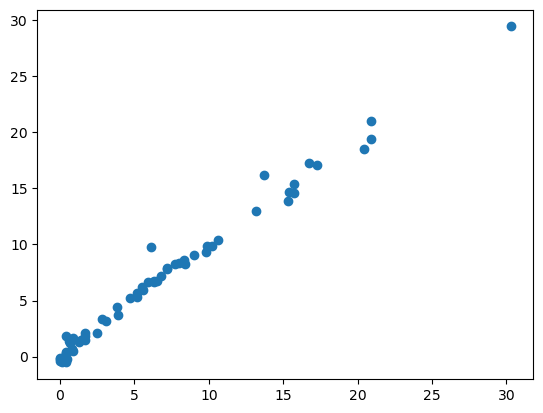

In [65]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(x_train_scaled,y_train)
y_pred_ridge=ridge.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred_ridge)
mse=mean_squared_error(y_test,y_pred_ridge)
scorer2=r2_score(y_test,y_pred_ridge)
print('MAE:',mae)
print('MSE:',mse)
print('R2 Score:',scorer2)
plt.scatter(y_test,y_pred_ridge)
plt.show()

MAE: 0.5642305340105683
MSE: 0.6949198918152052
R2 Score: 0.9842993364555513


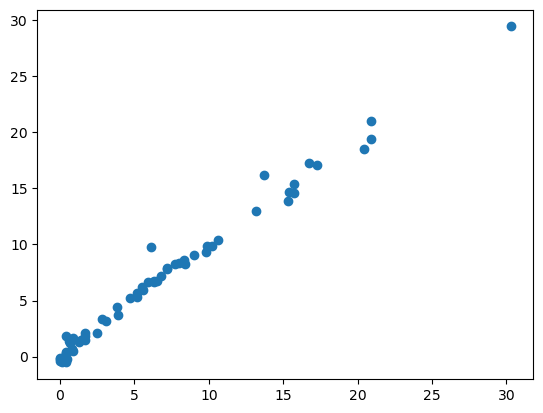

In [62]:
from sklearn.linear_model import RidgeCV
Ridge_CV=RidgeCV(cv=5)
Ridge_CV.fit(x_train_scaled,y_train)
y_pred_Ridgecv=Ridge_CV.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred_Ridgecv)
mse=mean_squared_error(y_test,y_pred_Ridgecv)
scorer2=r2_score(y_test,y_pred_Ridgecv)
print('MAE:',mae)
print('MSE:',mse)
print('R2 Score:',scorer2)
plt.scatter(y_test,y_pred_Ridgecv)
plt.show()

MAE: 1.8822353634896
MSE: 5.5172511010252245
R2 Score: 0.8753460589519703


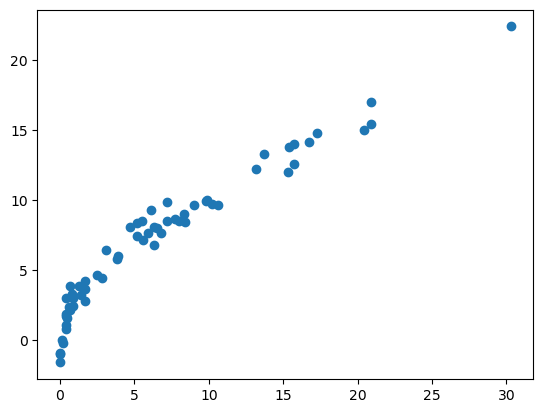

In [63]:
from sklearn.linear_model import ElasticNet
ElasticNet=ElasticNet()
ElasticNet.fit(x_train_scaled,y_train)
y_pred_ElasticNet=ElasticNet.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred_ElasticNet)
mse=mean_squared_error(y_test,y_pred_ElasticNet)
scorer2=r2_score(y_test,y_pred_ElasticNet)
print('MAE:',mae)
print('MSE:',mse)
print('R2 Score:',scorer2)
plt.scatter(y_test,y_pred_ElasticNet)
plt.show()

MAE: 0.6575946731430902
MSE: 0.8222830416276267
R2 Score: 0.9814217587854941


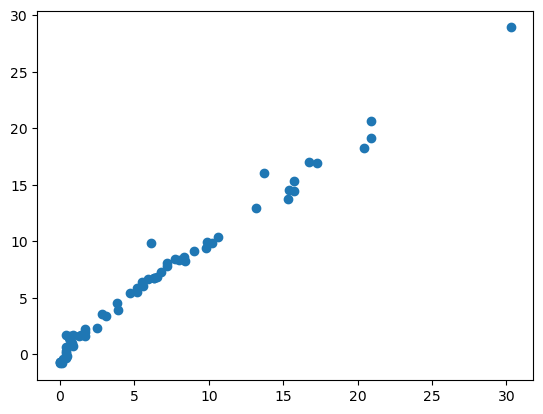

In [64]:
from sklearn.linear_model import ElasticNetCV
ElasticNetCV=ElasticNetCV(cv=5)
ElasticNetCV.fit(x_train_scaled,y_train)
y_pred_ElasticNetCV=ElasticNetCV.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred_ElasticNetCV)
mse=mean_squared_error(y_test,y_pred_ElasticNetCV)
scorer2=r2_score(y_test,y_pred_ElasticNetCV)
print('MAE:',mae)
print('MSE:',mse)
print('R2 Score:',scorer2)
plt.scatter(y_test,y_pred_ElasticNetCV)
plt.show()

# pickling models

In [66]:
import pickle
pickle.dump(scalar,open('scalar.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))